In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [3]:
"""
Import data from MMSplice output csv-files
"""

csv_benign = pd.read_csv('/Users/neverovaleksandr/Desktop/JG_lab/Pathogenicity_analysis/mmsplice_clinvar_eval_public/results/prediction_benign.csv')
csv_pathogenic = pd.read_csv('/Users/neverovaleksandr/Desktop/JG_lab/Pathogenicity_analysis/mmsplice_clinvar_eval_public/results/prediction_pathogenic.csv')

In [4]:
csv_benign.sort_values(['pathogenicity']).head(3)

,Unnamed: 0,ID,delta_logit_psi,exons,exon_id,gene_id,gene_name,transcript_id,region,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity
1783,5162,1:160098645:T>G,4.778205,1:160098441-160098640:+,ENST00000361216.9,ENSG00000018625,ENSG00000018625,ENST00000361216,donor,-3.399450,6.801356,-2.265721,-1.780279,-0.022472,-3.399450,6.801356,-2.265721,4.588819,-0.022472,9.641875e-08
6677,19974,1:5935162:A>T,2.907835,1:5934933-5935160:-,ENST00000378156.10,ENSG00000131697,ENSG00000131697,ENST00000378156,acceptor_dinu,-3.880490,1.352517,-2.512682,4.207385,-0.153231,-3.880490,5.372247,-2.512682,4.207385,-0.153231,2.392888e-07
186,757,1:103468767:A>T,2.494801,1:103468770-103468824:-,ENST00000353414.47,ENSG00000060718,ENSG00000060718,ENST00000353414,donor,-2.693487,4.655062,-4.350516,1.628008,0.126435,-2.693487,4.655062,-4.350516,4.953034,0.126435,1.040311e-04


In [5]:
csv_pathogenic.sort_values(['pathogenicity']).head(3)

,Unnamed: 0,ID,delta_logit_psi,exons,exon_id,gene_id,gene_name,transcript_id,region,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity
4044,12538,1:45805891:C>T,3.343323,1:45805894-45806069:-,ENST00000483642.5,ENSG00000132781,ENSG00000132781,ENST00000483642,donor,-1.265571,2.072325,-2.281264,-0.050667,-0.069541,-1.265571,2.072325,-2.281264,4.405549,-0.069541,0.000015
3948,11409,1:45796189:ATACAGGT>TGGGCTGTTGG,2.113281,1:45796187-45796229:-,ENST00000354383.2,ENSG00000132781,ENSG00000132781,ENST00000354383,donor,-3.368888,4.753393,-4.323879,4.427720,0.315856,-3.368888,4.753393,-4.550780,7.502277,0.315856,0.000054
3870,11166,1:43408982:CCCGTCAGCTT>C,1.139507,1:43408896-43408992:-,ENST00000372500.3,ENSG00000117394,ENSG00000117394,ENST00000372500,exonic,-3.212055,5.353342,-2.687650,6.330416,0.077859,-3.212055,6.829846,-2.604446,6.330416,0.077859,0.000339


In [6]:
"""
Create dataframe with columns consist of pathogenicity scores predicted for pathogenic and for benign ClinVar variants
"""

data = pd.DataFrame({"Pathogenic": csv_pathogenic['pathogenicity'], "Benign": csv_benign['pathogenicity']})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7598 entries, 0 to 7597
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pathogenic  4763 non-null   float64
 1   Benign      7598 non-null   float64
dtypes: float64(2)
memory usage: 118.8 KB


<AxesSubplot:title={'center':'MMSplice pathogenicity score prediction for benign ClinVar variants'}, xlabel='Pathogenicity score'>

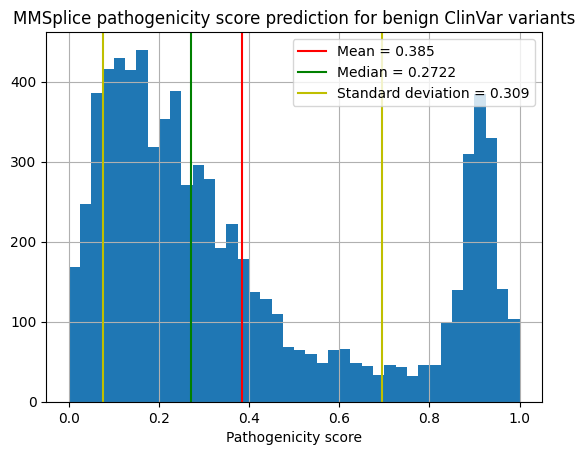

In [6]:
"""
The histogram of pathogenicity score distribution in benign sample
"""

plt.axvline(x=data['Benign'].mean(), color='r', label=f"Mean = {round(data['Benign'].mean(), 4)}")
plt.axvline(x=data['Benign'].median(), color='g', label=f"Median = {round(data['Benign'].median(), 4)}")
plt.axvline(x=data['Benign'].mean()-data['Benign'].std(), color='y', label=f"Standard deviation = {round(data['Benign'].std(), 4)}")
plt.axvline(x=data['Benign'].mean()+data['Benign'].std(), color='y')
plt.title('MMSplice pathogenicity score prediction for benign ClinVar variants')
plt.xlabel('Pathogenicity score')
plt.legend()
data['Benign'].hist(bins=40)

<AxesSubplot:title={'center':'MMSplice pathogenicity score prediction for pathogenic ClinVar variants'}, xlabel='Pathogenicity score'>

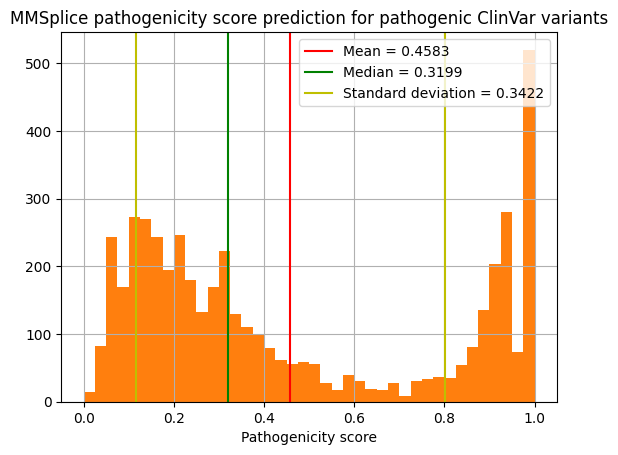

In [7]:
"""
The histogram of pathogenicity score distribution in pathogenic sample
"""

plt.axvline(x=data['Pathogenic'].mean(), color='r', label=f"Mean = {round(data['Pathogenic'].mean(), 4)}")
plt.axvline(x=data['Pathogenic'].median(), color='g', label=f"Median = {round(data['Pathogenic'].median(), 4)}")
plt.axvline(x=data['Pathogenic'].mean()-data['Pathogenic'].std(), color='y', label=f"Standard deviation = {round(data['Pathogenic'].std(), 4)}")
plt.axvline(x=data['Pathogenic'].mean()+data['Pathogenic'].std(), color='y')
plt.title("MMSplice pathogenicity score prediction for pathogenic ClinVar variants")
plt.xlabel('Pathogenicity score')
plt.legend()
data['Pathogenic'].hist(bins=40, color='#ff7f0e')

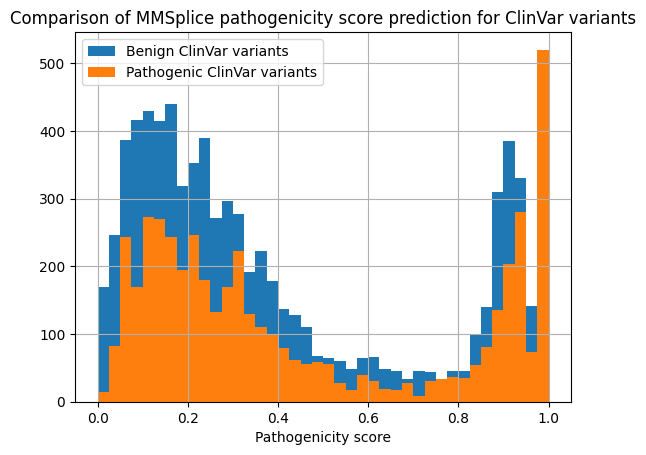

In [8]:
"""
The histogram of comparison of pathogenicity score distribution in benign and pathogenic samples
"""

data['Benign'].hist(bins=40, label='Benign ClinVar variants')
data['Pathogenic'].hist(bins=40, label='Pathogenic ClinVar variants')
plt.title('Comparison of MMSplice pathogenicity score prediction for ClinVar variants')
plt.xlabel('Pathogenicity score')
plt.legend()

<AxesSubplot:title={'center':'Comparison of MMSplice pathogenicity score prediction for ClinVar variants'}>

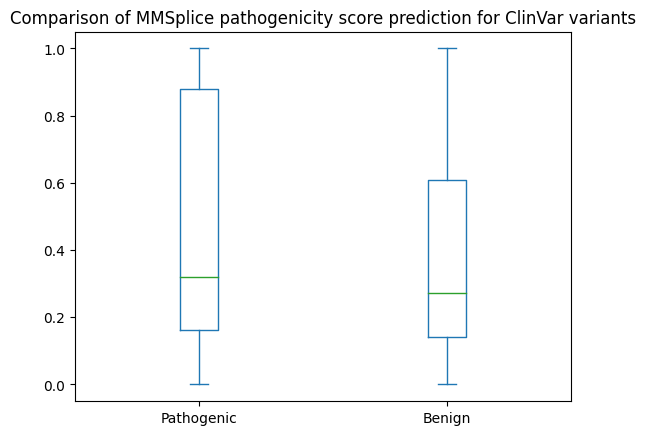

In [9]:
"""
The boxplot of comparison of pathogenicity score distribution in benign and pathogenic samples
"""

data.plot.box(title='Comparison of MMSplice pathogenicity score prediction for ClinVar variants')

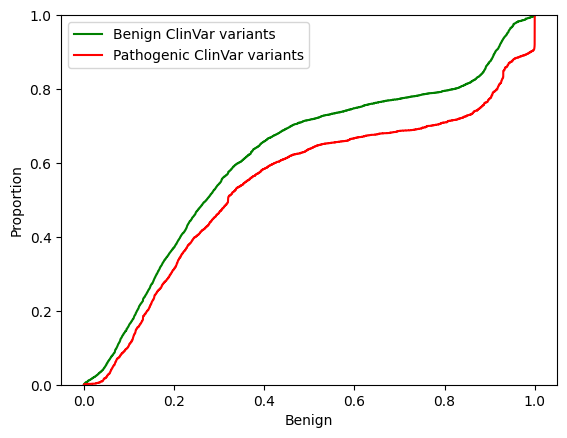

In [11]:
"""
The plot of estimated cumulative distribution fucntions related to benign and pathogenic samples
"""

sns.ecdfplot(data['Benign'], color='g', label='Benign ClinVar variants')
sns.ecdfplot(data['Pathogenic'], color='r', label='Pathogenic ClinVar variants')
plt.legend()

In [20]:
"""
The Kolmogorov-Smirnov test to check the hypothesis that to samples belong to the same distribution
"""
# H0 – both samples belong to the same distribution
# H1 – two samples belong to distinct distributions

sp.stats.ks_2samp(data['Benign'], data['Pathogenic'])

KstestResult(statistic=0.4305080284285338, pvalue=0.0, statistic_location=0.981355471196511, statistic_sign=1)

In [12]:
"""
The Mann-Whitney U rank test to check the hypothesis about the differences of two CDF
"""
# H0 – the distribution underlying sample x is the same as the distribution underlying sample y or greater
# H1 (parameter 'alternative') – the distribution underlying x is less than the distribution underlying y, i.e F(t) > G(t) for any t in (0, 1)

sp.stats.mannwhitneyu(data['Benign'], data['Pathogenic'], alternative='less', nan_policy='omit')

MannwhitneyuResult(statistic=15705090.0, pvalue=1.7677061355689928e-35)

In [21]:
"""
The Kruskal-Wallis H-test to check the significance of difference in median between two groups
"""
# H0 – the population median of two groups are equal
# H1 – the population median of two groups are not equal

sp.stats.kruskal(data['Benign'], data['Pathogenic'], nan_policy='omit')

KruskalResult(statistic=153.15944725808265, pvalue=3.5352982404004464e-35)

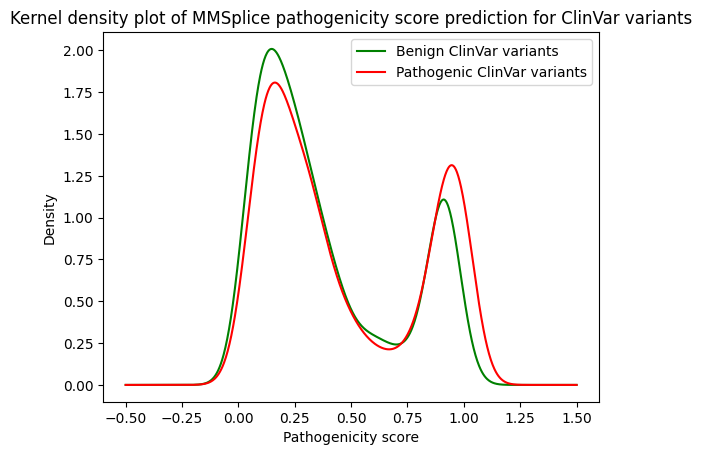

In [10]:
data['Benign'].plot.kde(bw_method=0.2, color='g', label='Benign ClinVar variants')
data['Pathogenic'].plot.kde(bw_method=0.2, color='r', label='Pathogenic ClinVar variants')
plt.title('Kernel density plot of MMSplice pathogenicity score prediction for ClinVar variants')
plt.xlabel('Pathogenicity score')
plt.legend()